# QAOA for Exact Cover, Toy Example
In this notebook a small exact cover problem is solved using QAOA. The quantum circuit used is shown and the approximation ratio for depth = 1 is computed. 

# Importing necessary modules

In [9]:
#run: pip install openquantumcomputing
from openquantumcomputing.QAOAExactCover import QAOAExactCover
from utilities_exactCover import computeOptimalSolution, computeAverageApproxRatio
from tailassignment_loader import *
from qiskit import *
import numpy as np
import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from qiskit.visualization import *

# Creating problem instance

In [10]:
size = 4
flights   = 3
solutions = 2

path_to_examples = "tailassignment_samples/"

FR, CR, best_sol = load_FR_CR(path_to_examples + f'FRCR_{size}_{flights}_{solutions}.txt')

# Creating a QAOA instance and drawing the quantum circuit

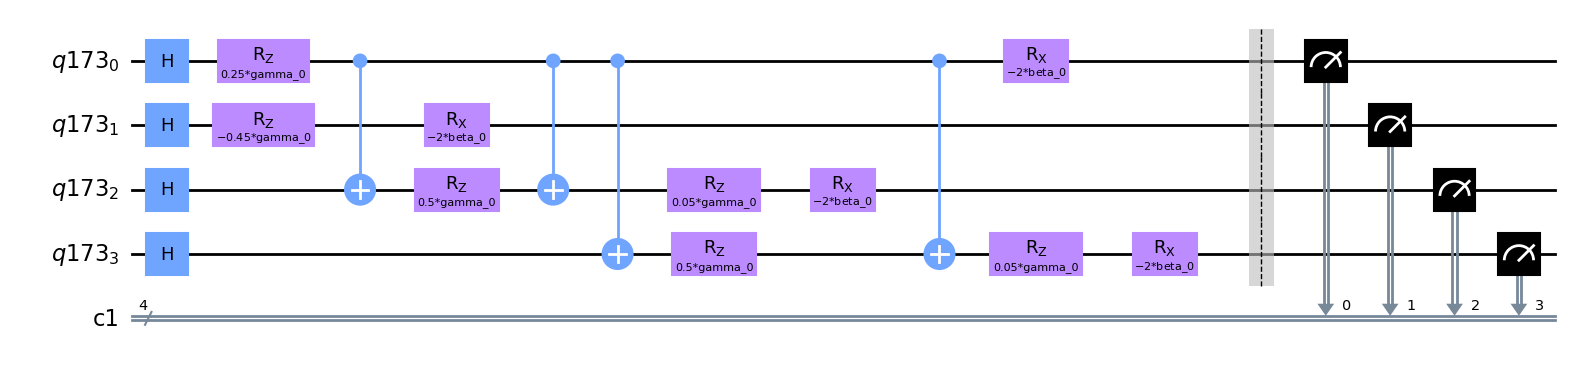

In [11]:
params={'FR': FR}
params['CR']= CR
params['instances'] = size
qaoaec = QAOAExactCover(params=params)
qaoaec.createParameterizedCircuit(1)
qaoaec.parameterized_circuit.draw(output = 'mpl')

# Sample and plot cost landscape

Calculating Energy landscape for depth p=1...
Executing sample_cost_landscape
parameters:  2
Done execute
Done measurement
Calculating Energy landscape done


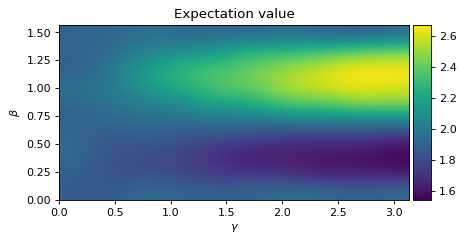

In [12]:
qaoaec.sample_cost_landscape(angles={"gamma": [0,np.pi/2,10], "beta": [0,np.pi/2,10]})
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value')
im = ax.imshow(qaoaec.E,interpolation='bicubic',origin='lower',extent=[0,np.pi,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

# Search for the best parameters at depth = 1 and plot histogram

cost(depth= 1 )= 1.555859375


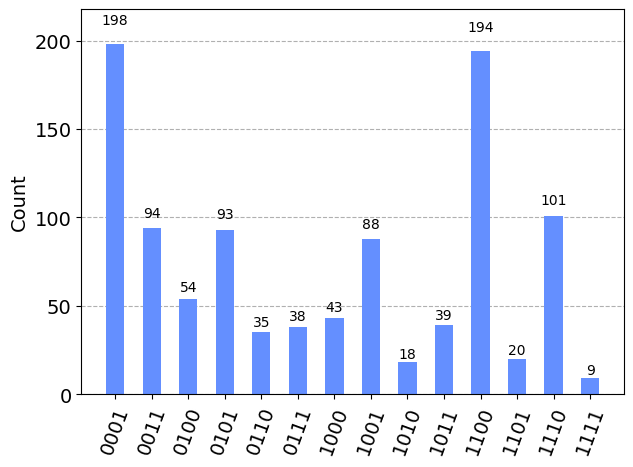

In [13]:
qaoaec.increase_depth() #Search for the best parameters at depth = 1

histogram = qaoaec.hist(qaoaec.angles_hist['d'+str(1)+'_final']) 
plot_histogram(histogram)

# Compute and print optimal solution with minium cost

In [14]:
cost_func = qaoaec.cost
isFeasible_func = qaoaec.isFeasible
mincost, solution = computeOptimalSolution(cost_func, isFeasible_func, FR)
print("Optimal solution: ", solution, "\n With cost: ", mincost)


Optimal solution:  0111 
 With cost:  0.30000000000000004


# Compute and print approximation ratio

In [15]:
print("Approximation ratio=", mincost/list(qaoaec.costval.values())[0])

Approximation ratio= 0.20079743774102882


# Compute and print approximation ratio (SECOND WAY)

In [16]:
approx_ratio = computeAverageApproxRatio(histogram, mincost, cost_func)
print("Approximation ratio: ", approx_ratio)

Approximation ratio:  0.2932284188201008
